In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [30]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [31]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

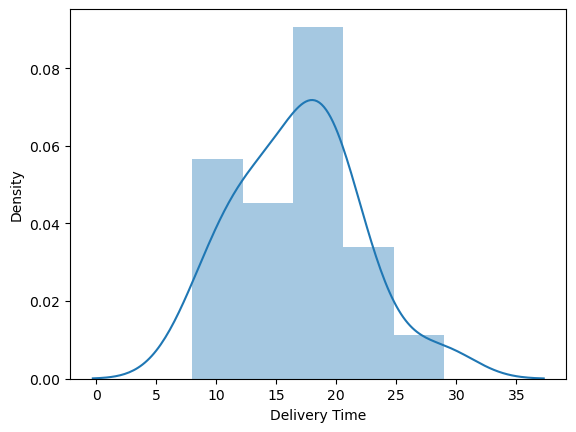

In [33]:
sns.distplot(df["Delivery Time"])

<Axes: xlabel='Sorting Time', ylabel='Density'>

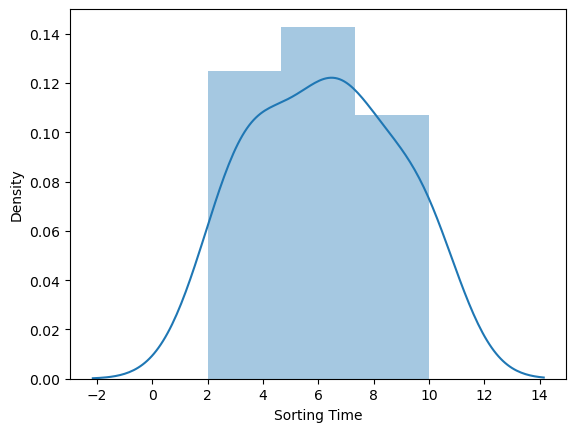

In [34]:
sns.distplot(df["Sorting Time"])

In [35]:
df1=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [36]:
#coorelation 
df1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

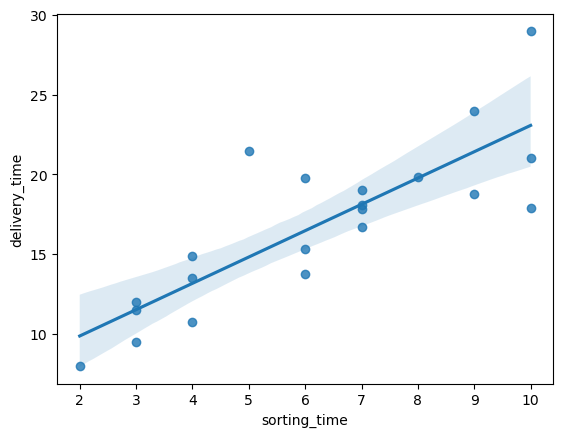

In [37]:
sns.regplot(x=df1["sorting_time"],y=df1["delivery_time"])

In [38]:
# now we need to build the model
model=smf.ols("delivery_time~sorting_time",data=df1).fit()


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        20:14:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Finding coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [41]:
#Finding the pvalues and tvalues
(model.tvalues,model.pvalues)


(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [42]:
#Finding the r-square values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [43]:
#model predictions
# Manual prediction for any sorting time 5
delivery_time=(6.582734)+(1.649020)*5   #there we are taking the model.params(parameters values)
delivery_time

14.827834

In [44]:
# prediction for say sorting time 5 and 8
model1=pd.Series([5,8])  # for prediction we can take any value.
model1

0    5
1    8
dtype: int64

In [45]:
data_pred=pd.DataFrame(model1,columns=["sorting_time"])
data_pred

,sorting_time
0,5
1,8


In [46]:
# final pred values
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64